In [13]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random as r
import matplotlib.pyplot as plt
from collections import Counter
import tqdm
from sklearn.base import clone
from sentence_transformers import SentenceTransformer
from sentence_transformers import util


review = "great RPG game 10/10, must play, loved the story and the characters, amazing graphics and gameplay, would recommend to anyone looking for a fun and engaging experience"
model = SentenceTransformer('all-MiniLM-L6-v2')

tags = {'Adventure': 43, 'Action': 30, 'Detective': 25, 'Noir': 20, 'Cyberpunk': 18, '1980s': 14, 'multiplayer': 13, 'FPS': 12, 'Shooter': 12, 'Horror': 11, 'Zombies': 11, 'Mystery': 10, 'Survival': 10, 'Atmospheric': 9, 'First-Person': 9, 'Open World': 9, 'Sci-fi': 9, 'Story Rich': 9, 'Action-Adventure': 8, 'Singleplayer': 8, 'Violent': 8, 'Gore': 7, 'Nudity': 7, 'RPG': 7, 'Tactical': 7, 'Third-Person Shooter': 7, 'Choices Matter': 6, 'Dark': 6, 'Fantasy': 6, 'Great Soundtrack': 6, 'Stealth': 6, 'Third Person': 6, 'Character Customization': 5, 'Co-op': 5, 'Dystopian': 5, 'Futuristic': 5, 'Open World Survival Craft': 5, 'Parkour': 5, 'PvP': 5, 'Sandbox': 5, 'Space': 5, 'Strategy': 5}
tag_embeddings = model.encode([str(i) for i in list(tags.keys())], convert_to_tensor=True)

review_embedding = model.encode(str(review), convert_to_tensor=True)
cosine_scores = util.cos_sim(review_embedding, tag_embeddings)

print("Cosine-Similarity Scores:", cosine_scores)

for tag, score in sorted(zip(list(tags.keys()), cosine_scores[0]), key=lambda x: x[1], reverse=True):
    print(tag, float(score))

Cosine-Similarity Scores: tensor([[ 0.3457,  0.1016,  0.0798,  0.0927,  0.1137, -0.0036,  0.2187,  0.0230,
          0.1779,  0.1221,  0.0976,  0.0132,  0.0895,  0.0760,  0.0406,  0.1740,
          0.1435,  0.1815,  0.3548,  0.1925,  0.0611, -0.0394,  0.1115,  0.5079,
          0.1398,  0.1767, -0.0022,  0.1089,  0.2667,  0.2376,  0.0773,  0.0978,
          0.1507,  0.0877,  0.1017,  0.0887,  0.2713,  0.0872,  0.1544,  0.1108,
          0.0332,  0.0981]])
RPG 0.5078901052474976
Action-Adventure 0.3547562062740326
Adventure 0.34572285413742065
Open World Survival Craft 0.2712859511375427
Fantasy 0.2667357623577118
Great Soundtrack 0.23758718371391296
multiplayer 0.21868282556533813
Singleplayer 0.19247107207775116
Story Rich 0.1815098226070404
Shooter 0.17794957756996155
Third-Person Shooter 0.17671898007392883
Open World 0.1739785522222519
PvP 0.1544153392314911
Character Customization 0.15069054067134857
Sci-fi 0.14350663125514984
Tactical 0.1398032009601593
Horror 0.12212754040956497

In [5]:
import pandas as pd
from collections import Counter
import ast

# Load CSV
df = pd.read_csv("output.csv")

# Convert 'tags' string into actual dictionary
df['tags_dict'] = df['tags'].apply(ast.literal_eval)

# Aggregate all tags across all games
all_tags = Counter()
for tags in df['tags_dict']:
    all_tags.update(tags)

# Convert to DataFrame for easier sorting
tag_df = pd.DataFrame(all_tags.items(), columns=['tag', 'votes'])
tag_df = tag_df.sort_values(by='votes', ascending=False)

# Show top 10 most voted tags
(tag_df.head(25))


,tag,votes
0,Action,827366
2,Multiplayer,616210
26,Singleplayer,601640
41,Adventure,585096
24,Indie,547414
77,Open World,431682
115,Free to Play,421072
14,Strategy,407904
85,RPG,380488
32,Co-op,338243


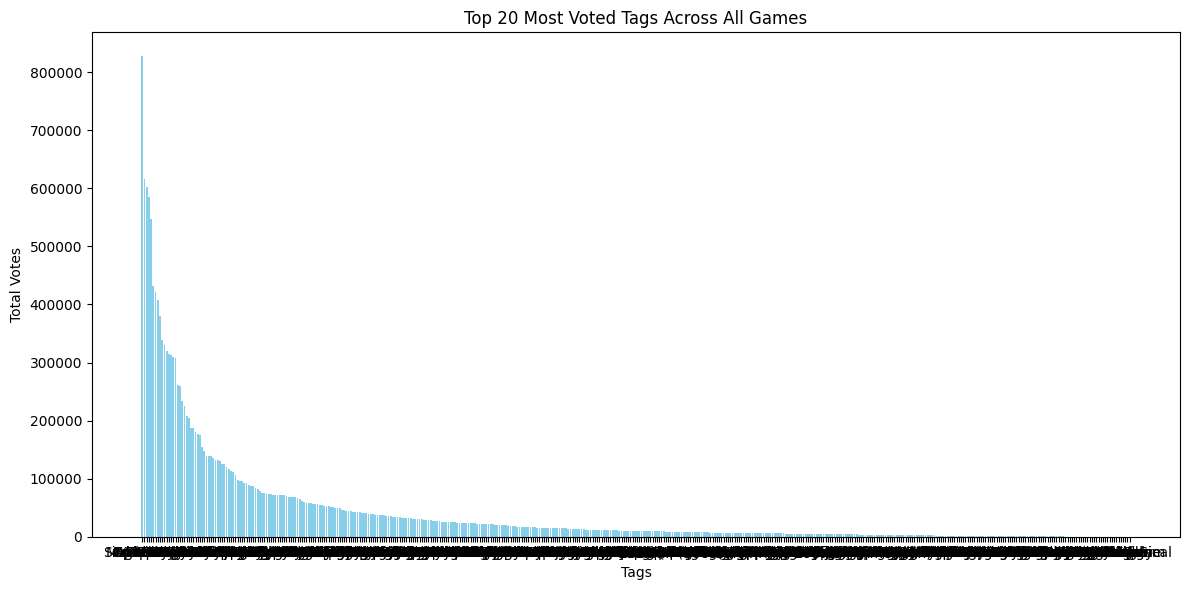

In [8]:
import matplotlib.pyplot as plt

# Take top 20 tags for better readability
top_tags = tag_df

plt.figure(figsize=(12, 6))
plt.bar(top_tags['tag'], top_tags['votes'], color='skyblue')
# plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.xlabel("Tags")
plt.ylabel("Total Votes")
plt.title("Top 20 Most Voted Tags Across All Games")
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


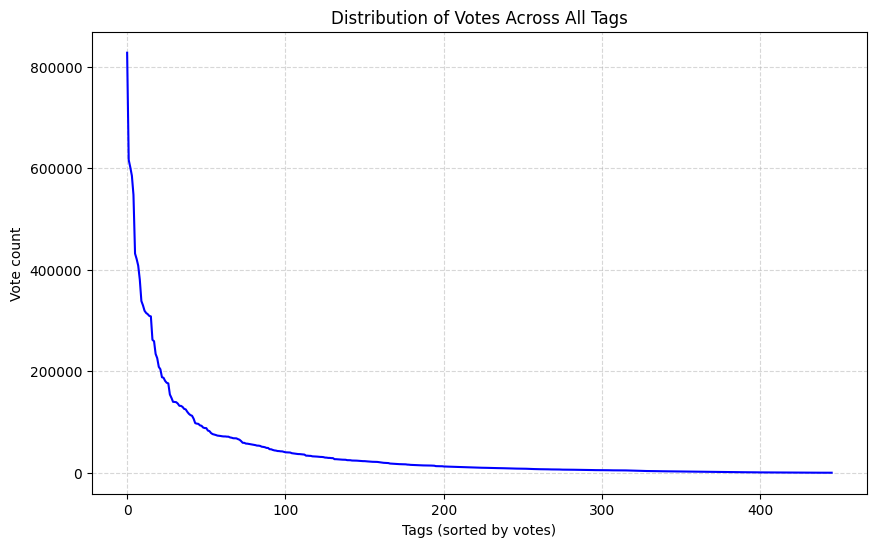

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get all vote counts and sort them descending
votes = np.array(tag_df['votes'])
votes_sorted = np.sort(votes)[::-1]  # descending

plt.figure(figsize=(10, 6))
plt.plot(votes_sorted, color='blue')
plt.xlabel("Tags (sorted by votes)")
plt.ylabel("Vote count")
plt.title("Distribution of Votes Across All Tags")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
